<a href="https://colab.research.google.com/github/Ganesh7134/Guvi_final_project/blob/main/instagram_influencers_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Influencer.csv")
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [ ]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

In [ ]:
df.rename(columns={"Avg. Likes":"Avg_likes" , "New Post Avg. Likes":"new_post_avg_likes","Country Or Region":"Country"},inplace=True)

In [ ]:
Followers_num = []
for i in df["Followers"]:
  Followers_num.append(int(float(i[:-1])*1000000))

In [ ]:
Posts_num = []
for i in df["Posts"]:
  if i[-1] != "k":
    Posts_num.append(int(i))
  else:
    Posts_num.append(int(float(i[:-1]) * 1000))

In [ ]:
avg_likes_num = []
c = 0
c1 = 0
for i in df["Avg_likes"]:
  if i[-1] == "k":
    c += 1
    avg_likes_num.append(int(float(i[:-1])*1000))
  else:
    avg_likes_num.append(int(float(i[:-1])*1000000))
    c1 += 1

print(c)
print(c1)

94
106


In [ ]:
df.loc[df["new_post_avg_likes"] == "0"]

,Rank,Channel Info,Influence Score,Followers,Avg_likes,Posts,60-Day Eng Rate,new_post_avg_likes,Total Likes,Country
156,157,\nmahi7781,58,39.5m,4.1m,107,0.002,0,444.0m,NaN


In [ ]:
new_avg_likes = []
for i in df["new_post_avg_likes"]:
  if i[-1] != "k" and i[-1] != "m":
    new_avg_likes.append(int(i))
  elif i[-1] == "k":
    new_avg_likes.append(int(float(i[:-1]) * 1000))
  else:
    new_avg_likes.append(int(float(i[:-1]) * 1000000))

In [ ]:
Total_likes_num = []
for i in df["Total Likes"]:
  if i[-1] == "m":
    Total_likes_num.append(int(float(i[:-1])*1000000))
  else:
    Total_likes_num.append(int(float(i[:-1])*1000000000))

In [ ]:
df["Total_likes_num"] = Total_likes_num

In [ ]:
df["new_avg_likes_num"] = new_avg_likes

In [ ]:
df["Avg_likes_num"] = avg_likes_num

In [ ]:
df["Posts_num"] = Posts_num

In [ ]:
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg_likes              0
Posts                  0
60-Day Eng Rate        0
new_post_avg_likes     0
Total Likes            0
Country               63
Total_likes_num        0
new_avg_likes_num      0
Avg_likes_num          0
Posts_num              0
dtype: int64

In [ ]:
df.fillna("unknown",inplace = True)

In [ ]:
df.isnull().sum()

Rank                  0
Channel Info          0
Influence Score       0
Followers             0
Avg_likes             0
Posts                 0
60-Day Eng Rate       0
new_post_avg_likes    0
Total Likes           0
Country               0
Total_likes_num       0
new_avg_likes_num     0
Avg_likes_num         0
Posts_num             0
dtype: int64

In [ ]:
df["Followers_num"] = Followers_num
df["Posts_num"] = Posts_num

In [ ]:
corr_matrix = df.corr()

In [ ]:
df.dtypes

Rank                    int64
Channel Info           object
Influence Score         int64
Followers              object
Avg_likes              object
Posts                  object
60-Day Eng Rate       float64
new_post_avg_likes     object
Total Likes            object
Country                object
Total_likes_num         int64
new_avg_likes_num       int64
Avg_likes_num           int64
Posts_num               int64
Followers_num           int64
dtype: object

<Axes: >

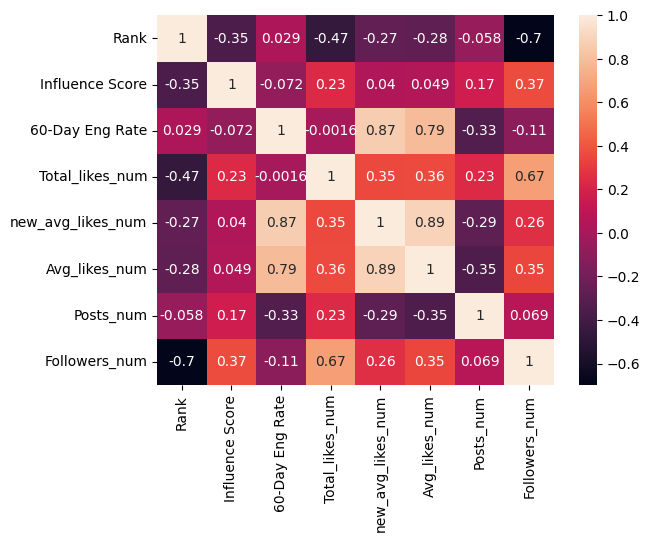

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix,annot=True)

In [ ]:
# Selecting pairs with absolute correlation above 0.8:
highly_correlated_pairs = np.where(abs(corr_matrix) > 0.8)
for i, j in zip(*highly_correlated_pairs):
    print(f"{df.columns[i]} and {df.columns[j]} are highly correlated with a correlation coefficient of {corr_matrix.iloc[i, j]}")
    print("-"*100)

Rank and Rank are highly correlated with a correlation coefficient of 1.0
----------------------------------------------------------------------------------------------------
Channel Info and Channel Info are highly correlated with a correlation coefficient of 1.0
----------------------------------------------------------------------------------------------------
Influence Score and Influence Score are highly correlated with a correlation coefficient of 1.0
----------------------------------------------------------------------------------------------------
Influence Score and Avg_likes are highly correlated with a correlation coefficient of 0.8662931593102474
----------------------------------------------------------------------------------------------------
Followers and Followers are highly correlated with a correlation coefficient of 1.0
----------------------------------------------------------------------------------------------------
Avg_likes and Influence Score are highly corre

##**What is the frequency distribution of the following features?**
* **Influence Score**

* **Followers**

* **Posts**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

* **The distplot shows a left-skewed distribution, confirmed by the negative skewness value. This means most individuals have higher influence scores, with a smaller tail extending towards lower scores.**

* **The distribution is clearly right-skewed, as confirmed by the positive skewness value. This means most individuals have fewer followers, with a smaller tail extending towards accounts with very high follower numbers.**

* **Skewness values close to 0 (e.g., within a small range like -0.5 to +0.5) can still suggest a near-normal distribution, but caution and further analysis are recommended.**

*  **A negative skewness value, like the one observed in the Instagram influence score distribution, indicates that there are more individuals with higher influence scores.**


Skewness: -3.4524004652506624


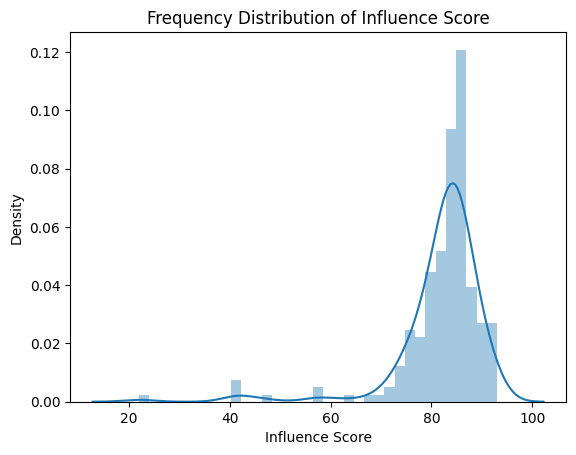

Skewness: 2.7878808168453437


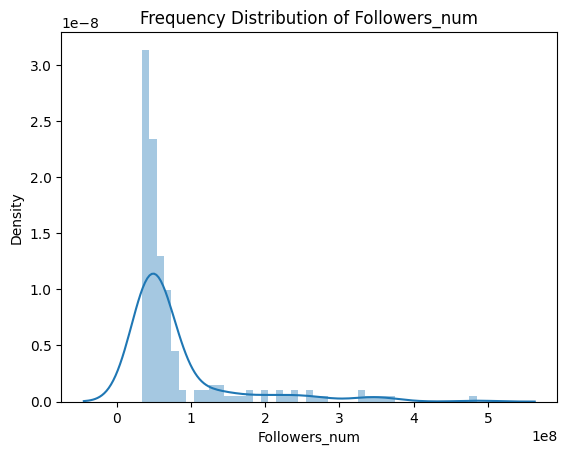

Skewness: 1.224704590123004


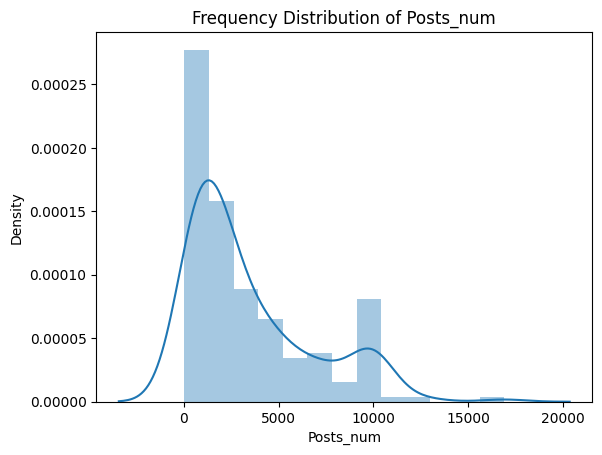

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

features = ["Influence Score", "Followers_num", "Posts_num"]

for i in features:
  sns.distplot(df[i])
  # Calculate skewness
  skewness = skew(df[i])

  # Print the skewness value
  print("Skewness:", skewness)

  plt.title(f"Frequency Distribution of {i}")
  plt.show()

# Repeat for other features

##**Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.**

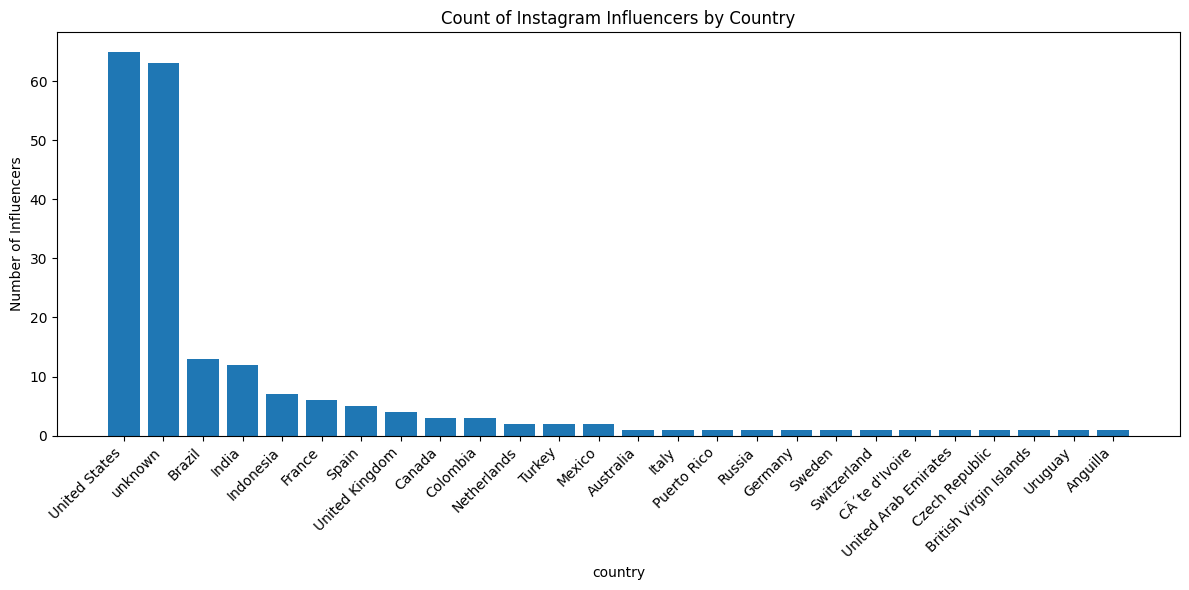

In [ ]:
# Assuming the relevant columns are "Country" and "Influencer" (adjust as needed):
influencers_per_country = df.groupby("Country")["Influence Score"].count().sort_values(ascending=False)

# Create the bar chart:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(influencers_per_country.index, influencers_per_country.values)

# Customize the chart:
plt.xlabel("country")
plt.ylabel("Number of Influencers")
plt.title("Count of Instagram Influencers by Country")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg_likes',
       'Posts', '60-Day Eng Rate', 'new_post_avg_likes', 'Total Likes',
       'Country', 'Total_likes_num', 'new_avg_likes_num', 'Avg_likes_num',
       'Posts_num', 'Followers_num'],
      dtype='object')

##**Top 10 influencers by followers**

In [ ]:
top_followers = df.sort_values(by="Followers", ascending=False).head(10)
top_followers[["Channel Info","Influence Score", "Followers","Followers_num"]]

,Channel Info,Influence Score,Followers,Followers_num
33,\ngal_gadot,85,88.0m,88000000
34,\ndualipa,74,87.3m,87300000
35,\nvindiesel,88,83.2m,83200000
36,\nnasa,88,83.1m,83100000
37,\npriyankachopra,85,82.7m,82700000
38,\nlalalalisa_m,70,82.6m,82600000
39,\nsnoopdogg,86,76.7m,76700000
40,\nShakira,88,76.2m,76200000
41,\ngigihadid,85,75.9m,75900000
42,\ndavidbeckham,86,75.4m,75400000


In [ ]:
top_followers[["Channel Info","Influence Score", "Followers","Followers_num"]]
top_followers.isna().sum()

Rank                  0
Channel Info          0
Influence Score       0
Followers             0
Avg_likes             0
Posts                 0
60-Day Eng Rate       0
new_post_avg_likes    0
Total Likes           0
Country               0
Total_likes_num       0
new_avg_likes_num     0
Avg_likes_num         0
Posts_num             0
Followers_num         0
dtype: int64

In [ ]:
df["Channel Info"].head()

0      \ncristiano
1      kyliejenner
2       \nleomessi
3    \nselenagomez
4        \ntherock
Name: Channel Info, dtype: object

In [ ]:
import plotly.express as px

# Assuming top_followers is a DataFrame
top_followers.dropna()

fig = px.bar(top_followers, x="Channel Info", y=["Followers_num", "Influence Score"], barmode="group")
fig.update_layout(
    xaxis_title="Channel Info",
    yaxis_title="Followers and Influence Score",  # Updated y-axis title
    title="Top 10 Followers by Channel Info with Influence Score"
)
fig.show()


##**Top 10 influencers by Average Likes**

In [ ]:
top_avg_likes = df.sort_values(by="Avg_likes", ascending=False).head(10)
top_avg_likes[["Channel Info","Influence Score", "Avg_likes","Avg_likes_num"]]

,Channel Info,Influence Score,Avg_likes,Avg_likes_num
27,\nrealmadrid,90,989.6k,989600
171,\neminem,84,988.4k,988400
146,\nranveersingh,85,986.9k,986900
89,\nsergioramos,87,983.7k,983700
40,\nShakira,88,976.1k,976100
86,\ntatawerneck,86,958.9k,958900
137,\nbrunamarquezine,84,943.5k,943500
99,\nkritisanon,76,891.5k,891500
95,433,79,872.5k,872500
53,\nronaldinho,78,868.9k,868900


In [ ]:
import plotly.express as px

# Assuming top_avg_likes is a DataFrame

fig = px.bar(top_avg_likes, x="Channel Info", y=["Avg_likes_num", "Influence Score"], barmode="group")
fig.update_layout(
    xaxis_title="Channel Info",
    yaxis_title="Average Likes and Influence Score",  # Updated y-axis title
    title="Top 10 Influencers by Average Likes with Influence Score"
)
fig.show()

##**Top 10 influencers by Total Likes**

In [ ]:
top_total_likes = df.sort_values(by="Total_likes_num", ascending=False).head(10)
top_total_likes[["Channel Info","Influence Score", "Total Likes","Total_likes_num"]]

,Channel Info,Influence Score,Total Likes,Total_likes_num
1,kyliejenner,91,57.4b,57400000000
0,\ncristiano,92,29.1b,29100000000
22,\nzendaya,87,20.8b,20800000000
6,\nkimkardashian,91,19.8b,19800000000
5,\narianagrande,92,18.5b,18500000000
25,\nbadgalriri,88,18.0b,18000000000
19,\nneymarjr,90,14.4b,14400000000
9,\njustinbieber,91,14.0b,14000000000
16,\nnickiminaj,90,12.9b,12900000000
4,\ntherock,91,12.6b,12600000000


In [ ]:
import plotly.express as px

# Assuming top_avg_likes is a DataFrame

fig = px.bar(top_total_likes, x="Channel Info", y=["Total_likes_num", "Influence Score"], barmode="group")
fig.update_layout(
    xaxis_title="Channel Info",
    yaxis_title="Total Likes and Influence Score",  # Updated y-axis title
    title="Top 10 Influencers by Total Likes with Influence Score"
)
fig.show()

**Describe the relationship between the following pairs of features using a suitable graph**

● Followers and Total Likes

● Followers and Influence Score

● Posts and Average likes

● Posts and Influence Score

* **Upward trend**: This suggests a positive correlation between followers and total likes. The higher the follower count, the more total likes an influencer tends to receive.

* **Downward trend**: This implies a negative correlation. Higher follower counts might be associated with lower total likes per follower, potentially due to audience saturation or inactive followers.

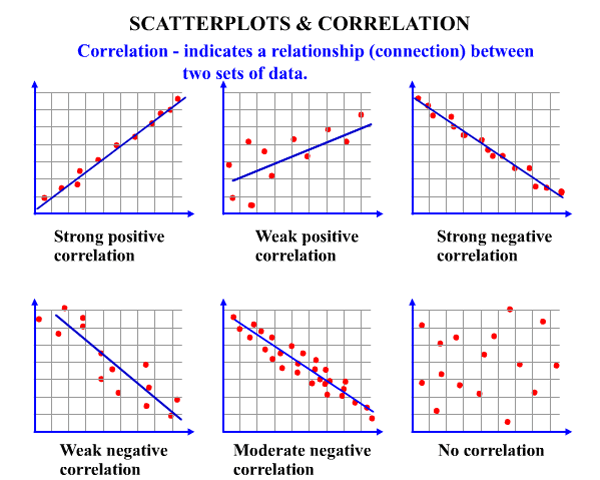

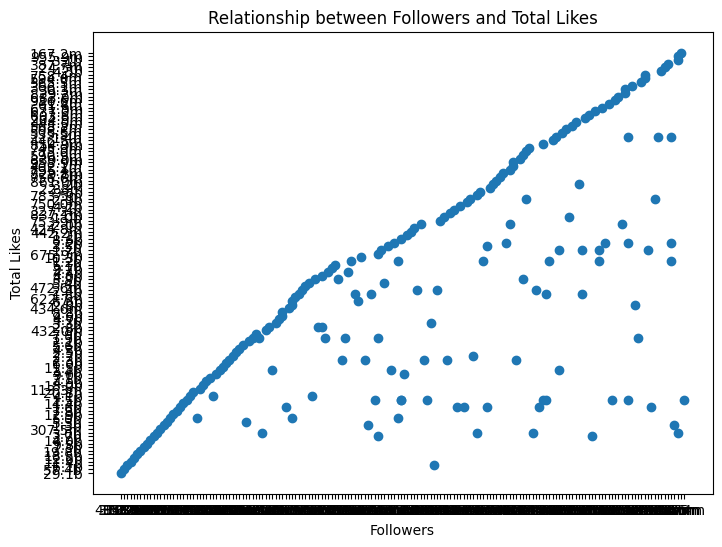

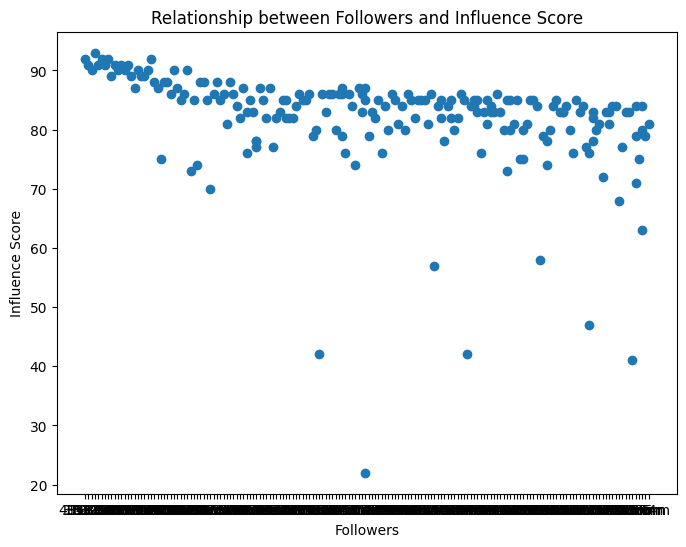

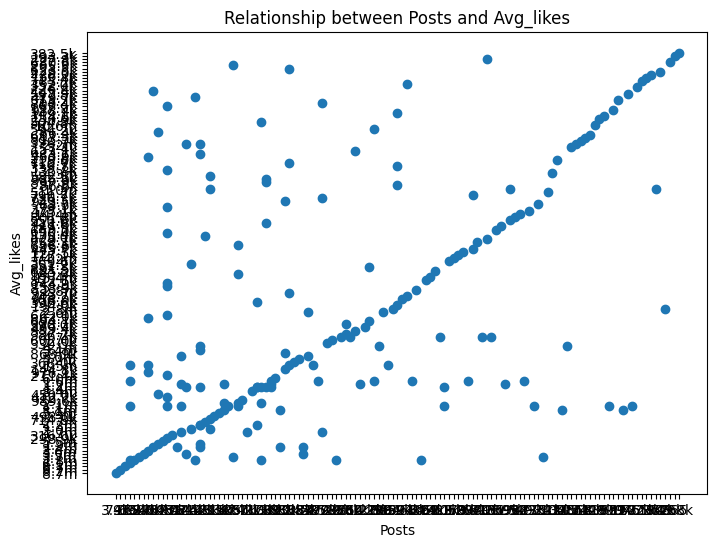

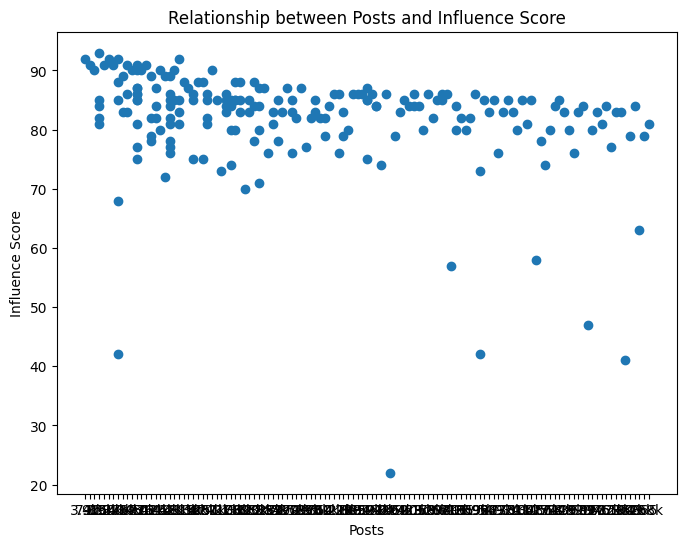

In [ ]:
# Pairs of features to visualize:
feature_pairs = [
    ("Followers", "Total Likes"),
    ("Followers", "Influence Score"),
    ("Posts", "Avg_likes"),
    ("Posts", "Influence Score"),
]

# Create scatter plots for each pair:
for feature1, feature2 in feature_pairs:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.scatter(df[feature1], df[feature2])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f"Relationship between {feature1} and {feature2}")
    plt.show()